<a href="https://colab.research.google.com/github/caroAM22/Trabajo_VA/blob/main/Trabajo_vision_artificial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1><center>Trabajo Visión Artificial </center></h1>**

**<h1><center> 2023-2s </center></h1>**
---


---


# Programa para detectar la calidad de los neumaticos

---


## Integrantes:

*   Carolina Alvarez Murillo
*   Mateo Alvarez Murillo
*   Cristian Londoño Franco
*   Miguel Angel Martinez Arenas



Desarrollaremos el programa para el reconocimiento de neumaticos defectuosos con el dataset [Tyre Quality Classification](https://www.kaggle.com/datasets/warcoder/tyre-quality-classification) obtenido de [Kaggle](https://www.kaggle.com/) el cual esta compuesto por 1028 imágenes clasificadas como defectuosas y 828 como buenas.

## Librerías

In [6]:
import os
import pandas as pd
import numpy as np
import cv2
from google.colab import drive
import matplotlib.pyplot as plt

Lectura de imagenes desde drive

In [7]:
drive.mount("/content/drive")
path_defective = "/content/drive/MyDrive/Vision/defective"
path_good = "/content/drive/MyDrive/Vision/good"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Lectura de imagenes y estandarización del tamaño

In [8]:
def read_and_resize_images(folder, new_width, new_height):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image = cv2.imread(os.path.join(folder, filename))
            if image is not None:
                # Resize the image
                resized_image = cv2.resize(image, (new_width, new_height))
                images.append(resized_image)
    return images

new_width = 128
new_height = 128


defective_images = read_and_resize_images(path_defective, new_width, new_height)
good_images = read_and_resize_images(path_good, new_width, new_height)

Visualización de las imagenes

In [9]:
def show_images(n, m, images, title):
  fig, ax = plt.subplots(4,5, figsize = (10,10))
  im = 0
  fig.suptitle(title, fontsize=40)

  for i in range (0,n):
    for j in range (0,m):
      img_rgb = cv2.cvtColor(images[j+im], cv2.COLOR_BGR2RGB)
      ax[i,j].imshow(img_rgb[:,:,1], cmap = "gray")
      ax[i,j].set_axis_off()
    im += 5

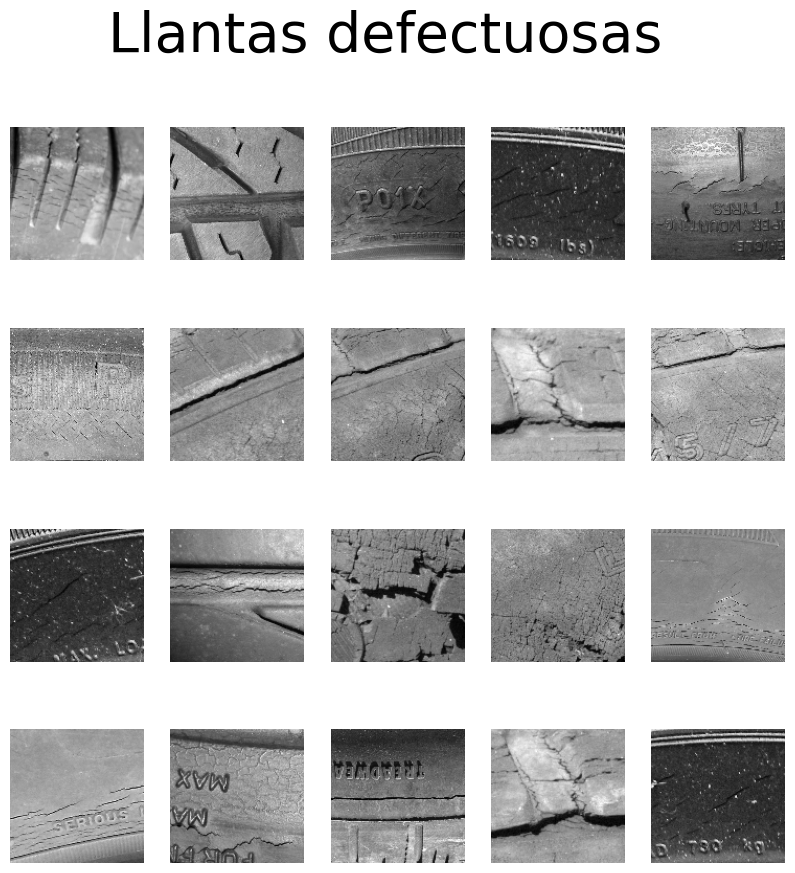

In [10]:
# Visualizacion de llantas defectuosas
show_images(4, 5, defective_images, 'Llantas defectuosas')

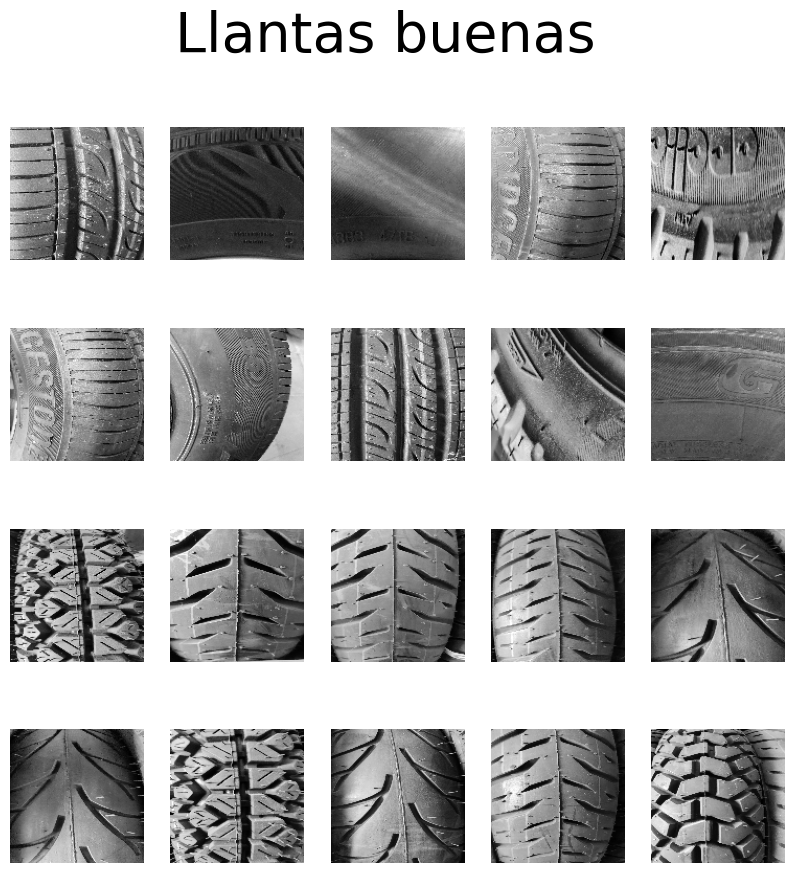

In [11]:
# Visualizacion de llantas buenas
show_images(4, 5, good_images, 'Llantas buenas')

Analisis del canal de color

Text(0.5, 1.0, 'Canal V')

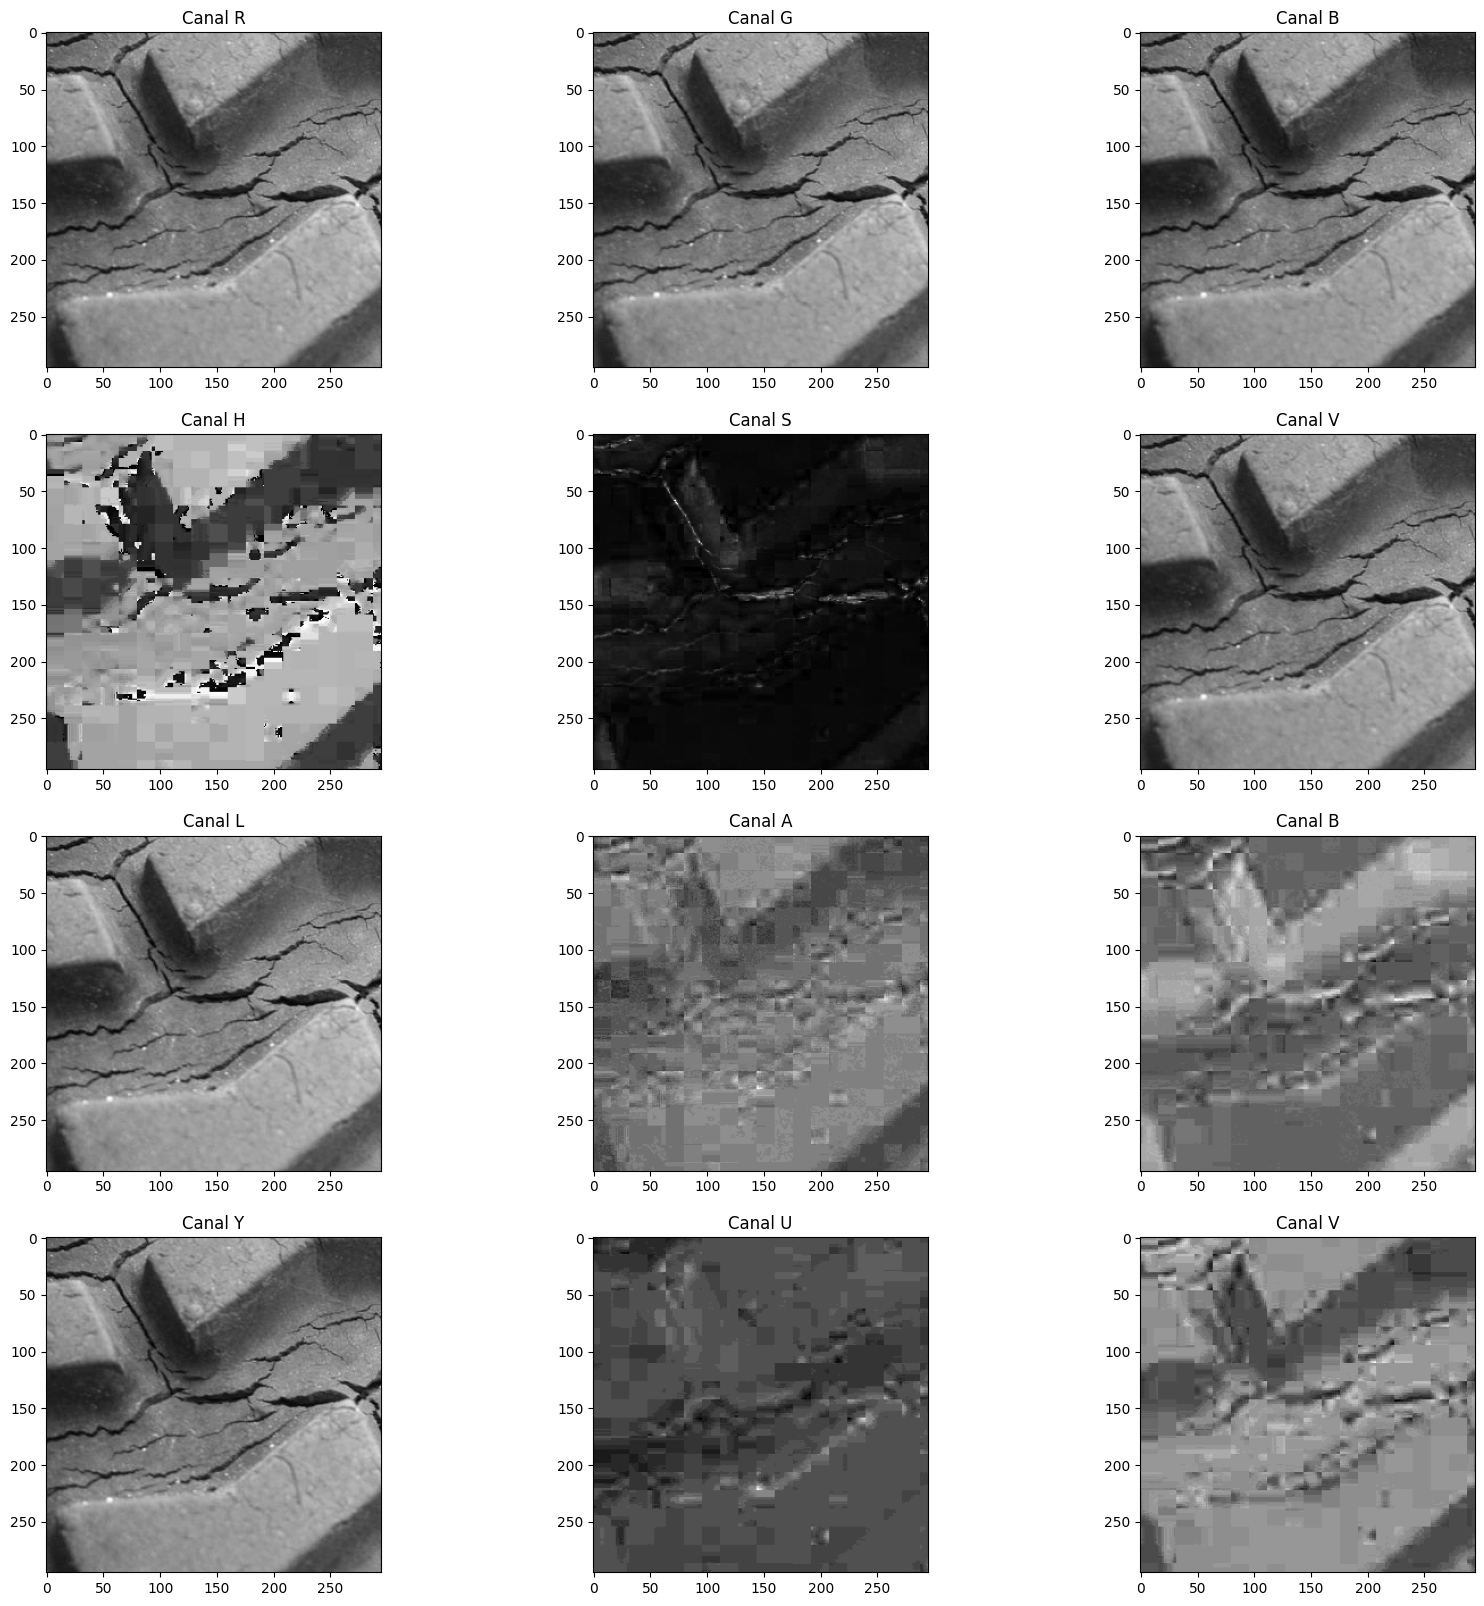

In [12]:
img = cv2.imread(path_defective+"/Defective (5).jpg")
fig, ax = plt.subplots(4,3, figsize = (20,20))
#RGB
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

ax[0,0].imshow(img_rgb[:,:,0], cmap = "gray")
ax[0,0].set_title("Canal R")
ax[0,1].imshow(img_rgb[:,:,1], cmap = "gray")
ax[0,1].set_title("Canal G")
ax[0,2].imshow(img_rgb[:,:,2], cmap = "gray")
ax[0,2].set_title("Canal B")

#HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

ax[1,0].imshow(img_hsv[:,:,0], cmap = "gray")
ax[1,0].set_title("Canal H")
ax[1,1].imshow(img_hsv[:,:,1], cmap = "gray")
ax[1,1].set_title("Canal S")
ax[1,2].imshow(img_hsv[:,:,2], cmap = "gray")
ax[1,2].set_title("Canal V")

#LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

ax[2,0].imshow(img_lab[:,:,0], cmap = "gray")
ax[2,0].set_title("Canal L")
ax[2,1].imshow(img_lab[:,:,1], cmap = "gray")
ax[2,1].set_title("Canal A")
ax[2,2].imshow(img_lab[:,:,2], cmap = "gray")
ax[2,2].set_title("Canal B")

#YUV
img_yuv  = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)

ax[3,0].imshow(img_yuv[:,:,0], cmap = "gray")
ax[3,0].set_title("Canal Y")
ax[3,1].imshow(img_yuv[:,:,1], cmap = "gray")
ax[3,1].set_title("Canal U")
ax[3,2].imshow(img_yuv[:,:,2], cmap = "gray")
ax[3,2].set_title("Canal V")